# Singer identification without feature extraction

## Import library

In [1]:
# For feature selection
import sklearn as sk
from sklearn.feature_selection import f_classif , f_regression , SelectKBest
# For mathematical operation
import numpy as np
import numpy.random as nr
import pandas as pd
import scipy,sklearn
# For plot
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline
# For SVM
from sklearn import svm, preprocessing
#from statsmodels.api import datasets
import sklearn.model_selection as ms
import sklearn.metrics as sklm
# For GMM
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

## Import dataframe

In [2]:
df=pd.read_csv('/media/mydata/courses/PROJET/Pratical_part/data2/final_data.csv')
data=df.T
lst2=['Celine','Celine','Celine','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Adele','Celine','Adele','Adele','Celine','Celine','Celine','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele',
 'Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Adele','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Celine','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou',
 'Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Garou','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila',
 'Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila','Singuila']
data['output']= lst2
data['lab']=data.output.map({"Celine":0,"Adele":1,"Garou":2,"Singuila":3})
collist = data.columns.tolist()
cols_input = collist[0:263168]
data = data[cols_input + ["lab"]]
data.head()
data


,0,1,2,3,4,5,6,7,8,9,...,263159,263160,263161,263162,263163,263164,263165,263166,263167,lab
0,-0.015948,-0.021025,-0.024122,-0.023574,-0.018674,-0.010003,0.000656,0.010829,0.018100,0.020864,...,-0.182515,-0.128457,-0.041981,0.046224,0.107028,0.111363,0.042921,-0.077803,-0.189423,0
1,-0.003060,-0.003395,-0.003619,-0.003764,-0.003857,-0.003920,-0.003969,-0.004009,-0.004032,-0.004023,...,-0.045864,-0.030337,-0.040960,-0.073816,-0.110153,-0.128534,-0.118635,-0.087783,-0.056163,0
2,-0.007804,-0.005254,-0.001886,0.001970,0.005888,0.009421,0.012171,0.013851,0.014322,0.013595,...,0.001610,0.009754,0.003367,0.002244,0.008993,0.011612,0.015421,0.021193,0.023067,0
3,0.000343,0.000216,0.000038,-0.000150,-0.000300,-0.000377,-0.000361,-0.000257,-0.000090,0.000100,...,0.029200,0.028005,0.026717,0.025379,0.024033,0.022719,0.021472,0.020322,0.019291,0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.045842,-0.046278,-0.046686,-0.047066,-0.047418,-0.047740,-0.048032,-0.048294,-0.048524,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-0.015522,-0.020695,-0.023954,-0.023451,-0.024720,-0.025070,-0.026068,-0.022991,-0.018222,-0.018807,...,-0.201216,-0.215481,-0.220856,-0.209793,-0.189705,-0.197344,-0.218204,-0.195893,-0.211245,3
196,-0.024112,-0.026290,-0.023070,-0.008032,0.007306,0.007131,0.003448,0.007773,0.004604,-0.008248,...,-0.022824,-0.002829,0.028391,0.023125,0.009261,0.017136,0.003816,-0.026509,-0.039486,3
197,0.009143,-0.009991,0.003230,0.003441,0.002890,0.001517,-0.000392,0.004677,0.001185,0.000368,...,-0.178692,-0.186335,-0.191924,-0.186811,-0.176625,-0.176565,-0.186211,-0.191694,-0.186021,3
198,0.001813,-0.000494,0.009583,0.027555,0.013380,-0.018582,-0.012569,0.014085,0.016076,0.013164,...,-0.207126,-0.215337,-0.198325,-0.200946,-0.200206,-0.169349,-0.156225,-0.176400,-0.185206,3


## Feature selection


### Input and output

In [3]:
#lst=['Mean_H1','Sp_Entropy_H1','Mean_H2','Sp_Entropy_H2','Mean_H3','Sp_Entropy_H3','Mean_H4','Sp_Entropy_H4','Mean_A4','Sp_Entropy_A4','Psd_H1','Psd_H2','Psd_H3','Psd_H4','Psd_A4','Median_init_s','Mean_init_s','Std_init_s']
X = np.array(data.drop('lab', axis=1))
y = np.array(data['lab'])

### Impact of parameters


/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

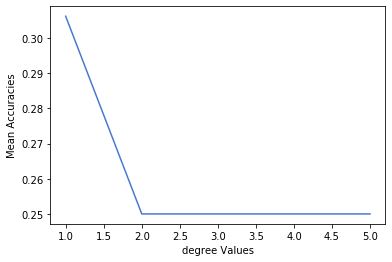

In [11]:
degree_vals = [1,2,3,4,5]
accuracy_vals = []
for g in degree_vals:
    svc = SVC(kernel='poly',degree=g)
    scores = cross_val_score(svc, X, y, cv=20, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(degree_vals, accuracy_vals)
plt.xlabel('degree Values')
plt.ylabel('Mean Accuracies')
plt.show()

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

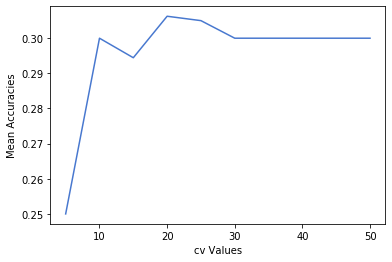

In [5]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='poly',degree=1)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

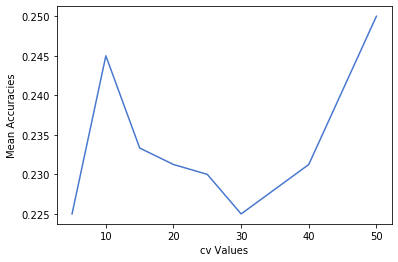

In [13]:
cv_vals = [5,10,15,20,25,30,40,50]
accuracy_vals = []
for g in cv_vals:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_vals.append(scores.mean())
    #
plt.plot(cv_vals, accuracy_vals)
plt.xlabel('cv Values')
plt.ylabel('Mean Accuracies')
plt.show()

### Using Cross validation

In [7]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)
#parameters = {'C':[1, 10,50,100],'degree':[3,8],'gamma':('auto_deprecated','scale')}
svcp = SVC(kernel='poly',degree=1)
#clf = GridSearchCV(svcp, parameters)
scores = cross_val_score(svcp, X, y, cv=20, scoring='accuracy')
print(scores.mean())

/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/victoiredjimna/anaconda3/

0.30625


#### LINEAR

In [30]:
svcl = SVC(kernel='linear')
scores = cross_val_score(svcl, X, y, cv=18, scoring='accuracy')
print(scores.mean())

0.2361111111111111


In [26]:
svcl = SVC(kernel='rbf', gamma=0.001)
scores = cross_val_score(svcl, X, y, cv=16, scoring='accuracy')
print(scores.mean())

0.30078125


In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
Cv_vals = [5,10,15,20,24,25,26,30,35,37,40,44,45,50]
accuracy_poly = []
accuracy_line = []
accuracy_rbf = []
for g in Cv_vals:
    svc = SVC(kernel='linear')
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_line.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='poly',degree=2,C=4)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_poly.append(scores.mean())
for g in Cv_vals:
    svc = SVC(kernel='rbf', gamma=0.7,C=14)
    scores = cross_val_score(svc, X, y, cv=g, scoring='accuracy')
    accuracy_rbf.append(scores.mean())
accuracy_line, accuracy_poly,accuracy_rbf

([0.225,
  0.24500000000000002,
  0.2333333333333333,
  0.23125,
  0.22395833333333334,
  0.23,
  0.22596153846153846,
  0.225,
  0.225,
  0.22635135135135134,
  0.23125,
  0.24147727272727273,
  0.24166666666666667,
  0.25],
 [0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25,
  0.25],
 [0.32,
  0.3350000000000001,
  0.3430555555555556,
  0.35416666666666663,
  0.34027777777777773,
  0.335,
  0.33653846153846156,
  0.35833333333333334,
  0.3678571428571429,
  0.36486486486486486,
  0.353125,
  0.35511363636363635,
  0.3472222222222222,
  0.335])